In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import csv

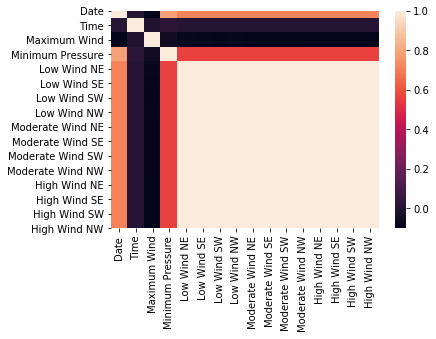

In [2]:
df=pd.read_csv('Pacific_train.csv')

feat=['Date',
'Low Wind NE',
'Low Wind SE',
'Low Wind SW',
'Low Wind NW',
'Moderate Wind NE',
'Moderate Wind SE',
'Moderate Wind SW',
'Moderate Wind NW',
'High Wind NE',
'High Wind SE',
'High Wind SW',
'High Wind NW']

target='Status'

sns.heatmap(df.corr())

In [3]:
x=df[feat]
y=df[target]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1,stratify=y)

In [4]:
num_leafs=[10, 20]
param_grid = {'max_depth': np.arange(8,20),'min_samples_leaf':num_leafs}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=10)

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
dtscore=accuracy_score(y_test,y_pred)

C:\Users\Cp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [5]:
param_grid = {
    'n_estimators': [50,150],
}
CV_rfc = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv= 10)

CV_rfc.fit(X_train, y_train)

y_pred=CV_rfc.predict(X_test)
rfaccuracy=accuracy_score(y_test,y_pred)

C:\Users\Cp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [6]:
param_grid = {}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
grid.fit(X_train, y_train) 

y_pred=grid.predict(X_test)
accsvm=accuracy_score(y_test,y_pred)

C:\Users\Cp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Cp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Cp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV]  ................................................................
[CV] .................................... , score=0.631, total=  15.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.0s remaining:    0.0s
C:\Users\Cp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................................... , score=0.620, total=  12.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   27.6s remaining:    0.0s
C:\Users\Cp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................................... , score=0.623, total=  13.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   41.1s finished
C:\Users\Cp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [7]:
feat=[
'Date',
'Time','Maximum Wind','Minimum Pressure']
target='Status'

x=df[feat]
y=df[target]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1,stratify=y)

param_grid={}
nb2 = GridSearchCV(GaussianNB(), cv=10, param_grid=param_grid)

nb2.fit(X_train,y_train)

y_pred=nb2.predict(X_test)
nb_acc=accuracy_score(y_test,y_pred)

C:\Users\Cp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [8]:
models=[['DecisionTreeClassifier',dtscore],['RandomForestClassifier',rfaccuracy],['GaussianNB',nb_acc],['SVC',accsvm]]
models

[['DecisionTreeClassifier', 0.6125398512221042],
 ['RandomForestClassifier', 0.6869287991498406],
 ['GaussianNB', 0.777683315621679],
 ['SVC', 0.6539851222104145]]

In [9]:
maxname=""
maxacc=0
for i,j in models:
    if j>maxacc:
        maxname=i
        maxacc=j
output=[[maxname],[np.round(maxacc,1)]]

In [10]:
with open('output.csv','w') as out:
    writer=csv.writer(out,delimiter=',')
    writer.writerows(output)